In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
module = fc.eightb.preselection.t8btag_minmass
dout = "gen_mp"

In [4]:
altfile = 'ranked_quadh_mp_{base}'
use_signal = [ module.full_signal_list.index(f) for f in module.signal_list ]
# signal = ObjIter([Tree(f, altfile=altfile, report=False) for f in tqdm(module.full_signal_list)])
signal = ObjIter([Tree(f, altfile=altfile, report=False) for f in tqdm(module.signal_list)])
bkg = ObjIter([Tree(module.Run2_UL18.QCD_B_List, altfile=altfile), Tree(module.Run2_UL18.TTJets, altfile=altfile)])
# data = ObjIter([ Tree(module.Run2_UL18.JetHT_Data_UL_List, altfile=altfile) ])


100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


In [5]:
class Config:
    def __init__(self, **kwargs):
        self.__dict__.update(**kwargs)

_template = eightb.TestAnalysis()
args = Config(
    dout=dout,
    ptcuts='loose', btagcuts='loose',
    ar_center = [125,125],
    vr_center = [210,210],
    sr_r = 50,
    cr_r = 70,
)

In [11]:
analysis = _template.__class__(
    signal=signal, bkg=bkg, 
    # data=data,
    use_signal=[0,1,2],
    dout=args.dout,
    ptcuts=args.ptcuts, btagcuts=args.btagcuts,
    ar_center = args.ar_center,
    vr_center = args.vr_center,
    sr_r = args.sr_r, 
    cr_r =  args.cr_r,
    # bdt_features = [
    #     'jet_ht','min_jet_deta','max_jet_deta','min_jet_dr','max_jet_dr'
    # ] + [
    #     f'h{i+1}_{var}'
    #     for var in ('pt','dr')
    #     for i in range(4)
    # ] + [
    #     f'h{i+1}{j+1}_{var}'
    #     for var in ('dphi','deta')
    #     for i in range(4)
    #     for j in range(i+1, 4)
    # ],
)

In [12]:
analysis

Analysis: analysis
<MethodList
   0: <[pending] reweight_bkg>
   1: <[pending] jet_kin_cuts>
   2: <[pending] cutflow>
   3: <[pending] plot_kin>
   4: <[pending] plot_2d_higgs_m>
   5: <[pending] build_higgs_dm>
   6: <[pending] plot_abcd_regions>
   7: <[pending] var_correlations>
   8: <[pending] build_abcd>
   9: <[pending] print_abcd_yields>
   10: <[pending] train_ar_bdt>
   11: <[pending] calc_limits>
   12: <[pending] train_vr_bdt>
   13: <[pending] plot_vr_features>
>

In [16]:
analysis.methods[:2].run()

Running method: reweight_bkg
Running method: jet_kin_cuts


In [17]:
analysis

Analysis: analysis
<MethodList
   0: <[done] reweight_bkg>
   1: <[done] jet_kin_cuts>
   2: <[pending] cutflow>
   3: <[pending] plot_kin>
   4: <[pending] plot_2d_higgs_m>
   5: <[done] build_higgs_dm>
   6: <[done] plot_abcd_regions>
   7: <[done] var_correlations>
   8: <[pending] build_abcd>
   9: <[pending] print_abcd_yields>
   10: <[pending] train_ar_bdt>
   11: <[pending] calc_limits>
   12: <[pending] train_vr_bdt>
   13: <[pending] plot_vr_features>
>

Running method: build_higgs_dm
Running method: plot_abcd_regions


100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


Running method: var_correlations


100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


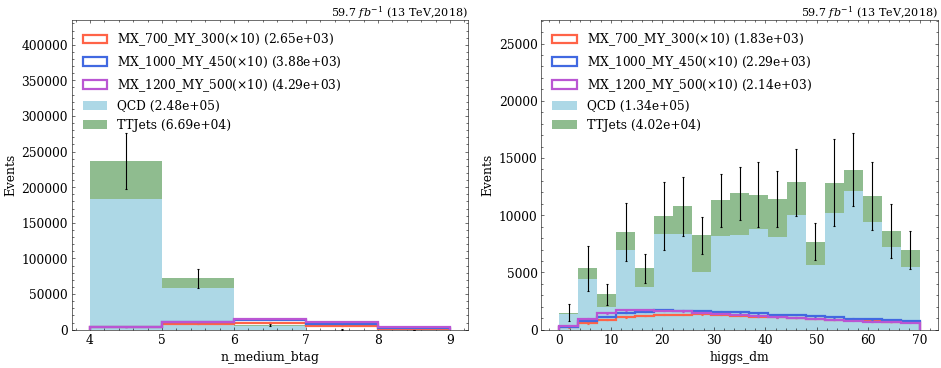

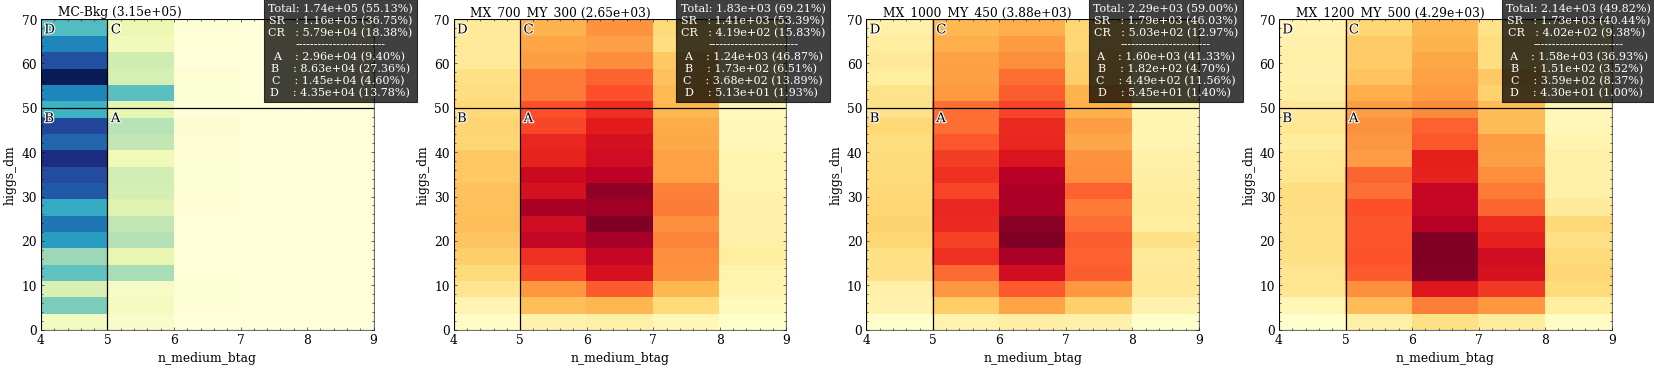

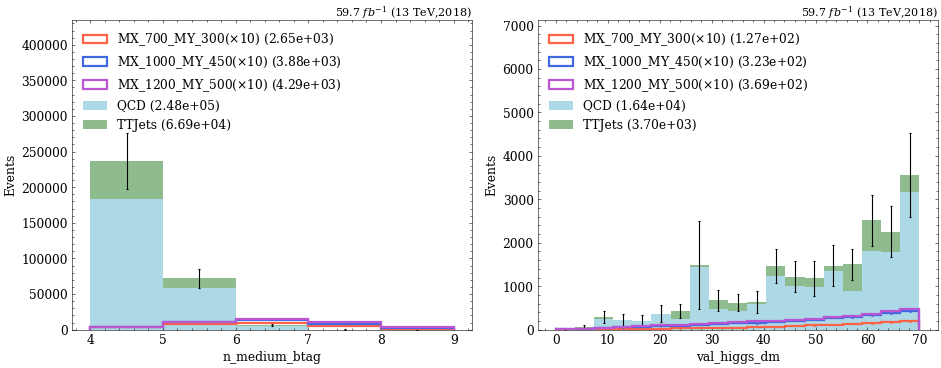

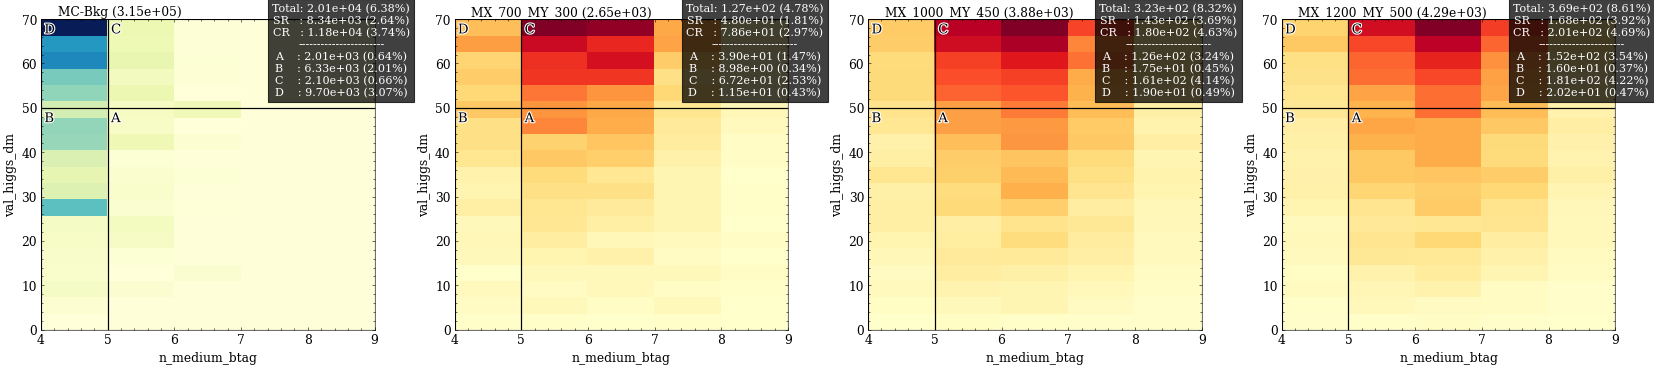

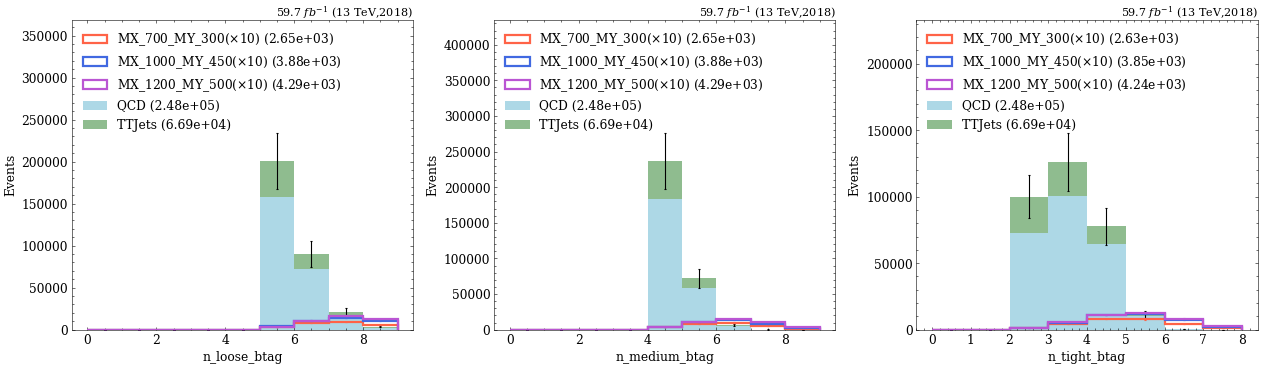

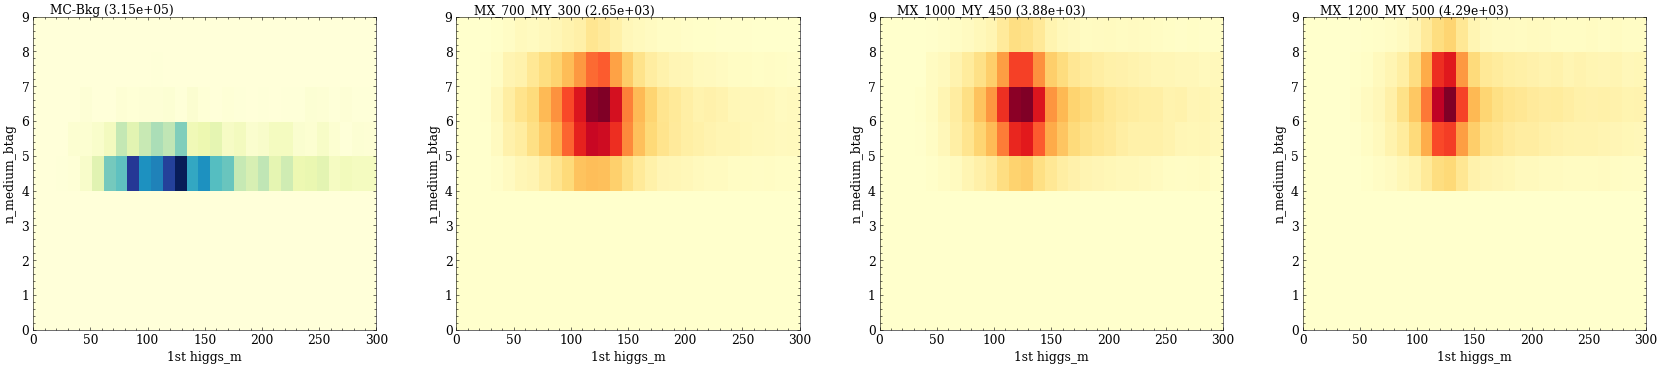

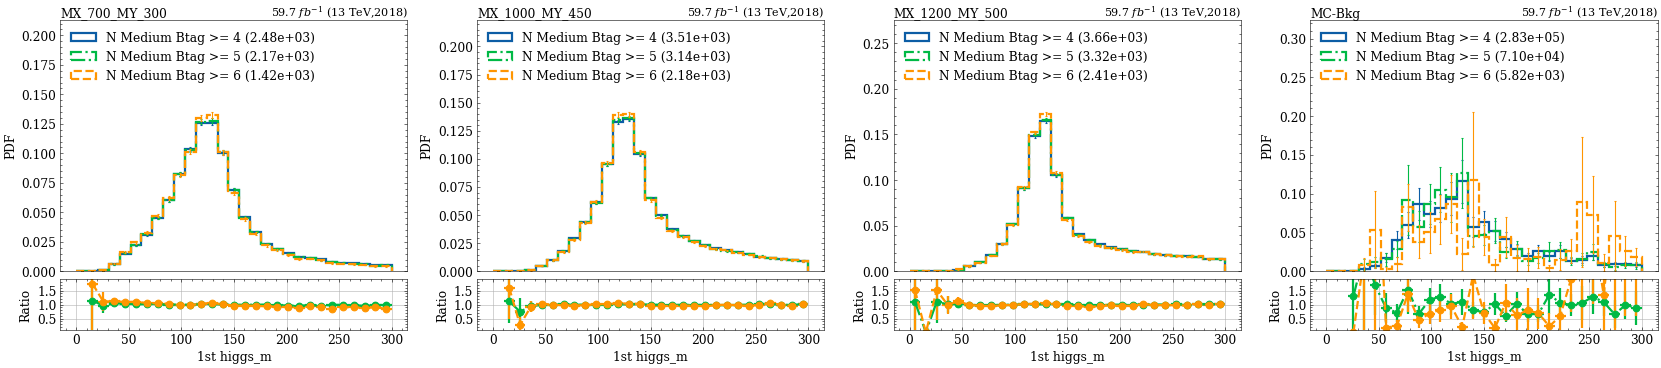

In [15]:
analysis.methods[[5,6,7]].run()

In [35]:
analysis.methods[5]()

100%|██████████| 2/2 [00:00<00:00, 12.05it/s]


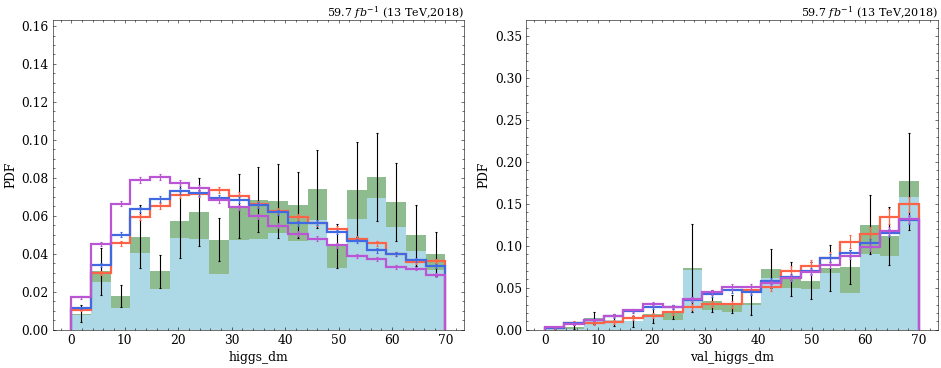

In [43]:
study.quick( 
    analysis.signal+analysis.bkg,
    varlist=['higgs_dm', 'val_higgs_dm'],
    binlist=[(0, analysis.cr_r, 20)]*2,
    efficiency=True,
)

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


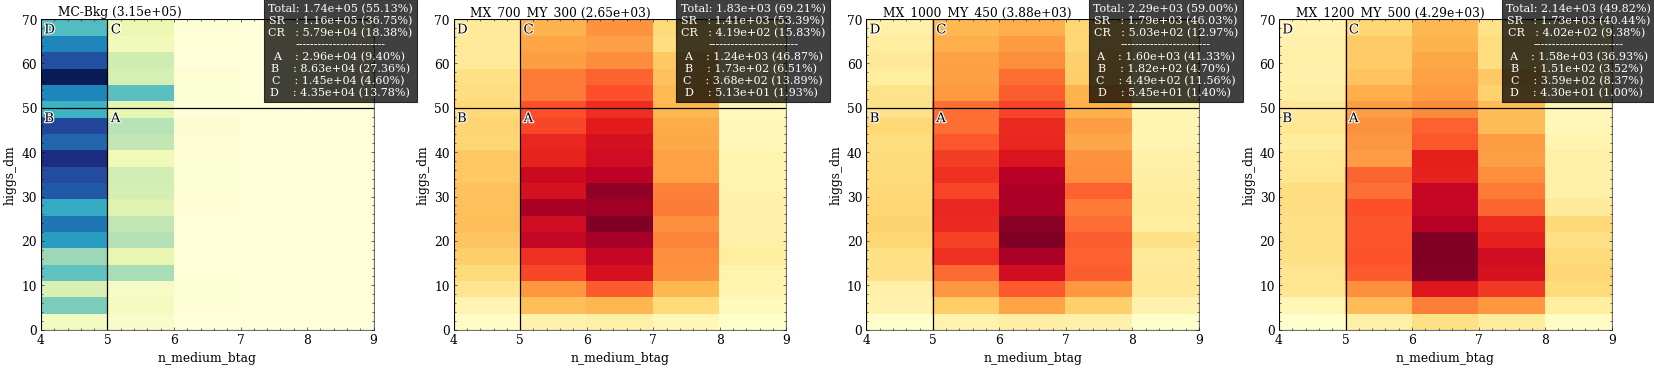

In [64]:
study.quick2d( 
    analysis.signal+analysis.bkg,
    varlist=['n_medium_btag','higgs_dm'],
    binlist=[np.arange(4,10),(0, analysis.cr_r, 20)],
    exe=draw_abcd(x_r=(4,5,9), y_r=(0, analysis.sr_r, analysis.cr_r), regions=["C","D","A","B"])
)

100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


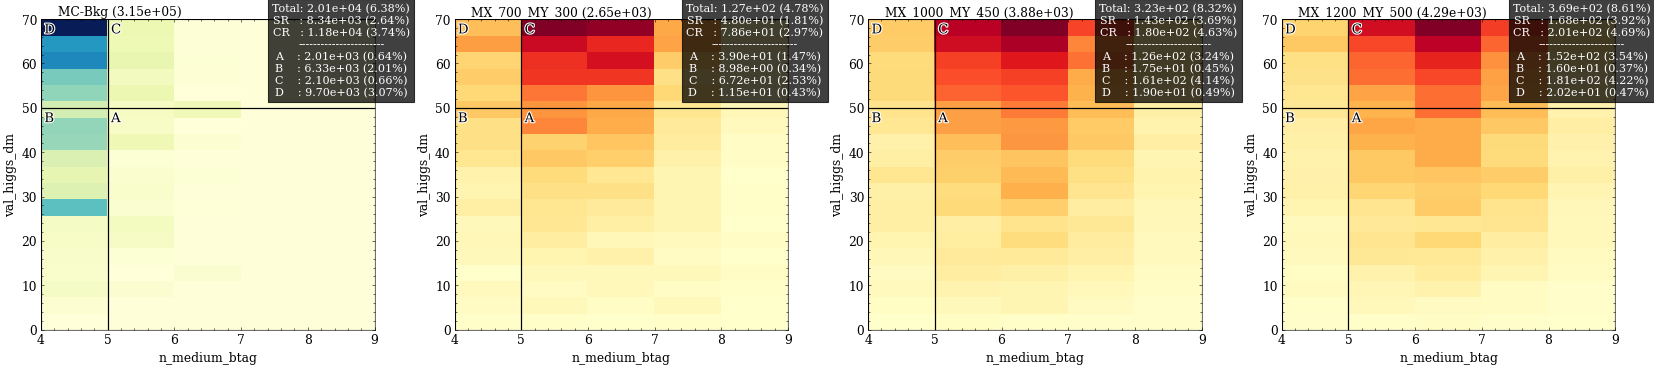

In [65]:
study.quick2d( 
    analysis.signal+analysis.bkg,
    varlist=['n_medium_btag','val_higgs_dm'],
    binlist=[np.arange(4,10),(0, analysis.cr_r, 20)],
    exe=draw_abcd(x_r=(4,5,9), y_r=(0, analysis.sr_r, analysis.cr_r), regions=["C","D","A","B"])
)